## Task F: Contrast sensitivity function of retinal ganglion cell

### 1.1 Define $K(x,y)$ and $K'(x,y)$

$$K(x, y) = \frac{w_c}{\sigma_c^2} \exp\left(-\frac{x^2 + y^2}{2\sigma_c^2}\right)
- \frac{w_s}{\sigma_s^2}\exp\left(-\frac{x^2 + y^2}{2\sigma_s^2}\right)$$

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from math import exp, cos, sin, pi

figures_dir = image_path = os.path.join("..", "figures")

def K(x,y,wc,ws,sigma_c,sigma_s):
    '''Gaussian kernel function'''
    # x = x/2
    # y = y/2
    return wc/(sigma_c**2) * exp(-(x**2+y**2)/(2*(sigma_c**2))) - ws/(sigma_s**2) * exp(-(x**2+y**2)/(2*(sigma_s**2)))

def get_kernel_DoG(wc,ws,sigma_c,sigma_s,L=None):
    '''Difference of Gaussian kernel (without extensions)'''
    if L is None:
        L = 6 * max(sigma_c, sigma_s)   # size of the kernel, cover [-3sigma, 3sigma]
        print(f"Kernel size L is set to {L}")
    M = np.zeros((L, L))
    for i in range(L):
        y = L/2 - i
        for j in range(L):
            x = j - L/2
            M[i,j] += K(x,y,wc,ws,sigma_c,sigma_s)
    return M

In [3]:
def g_c_DoG(k, kernel):
    g = 0
    L = kernel.shape[0]
    for i in range(L):
        y = L/2 - i
        for j in range(kernel.shape[1]):
            x = j - L/2
            g += kernel[i,j] * cos(k * x)
    return g
def g_s_DoG(k, kernel):
    g = 0
    L = kernel.shape[0]
    for i in range(L):
        y = L/2 - i
        for j in range(kernel.shape[1]):
            x = j - L/2
            g += kernel[i,j] * sin(k * x)
    return g

def g_DoG(k, kernel):
    gc = g_c_DoG(k, kernel)
    gs = g_s_DoG(k, kernel)
    return np.sqrt(gc**2 + gs**2)

### 1.2 Plot the receptive field

Kernel size L is set to 30


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_8557/1598510577.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"V1 kernel\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sigma_c:.3f}, $\sigma_s$={sigma_s:.3f})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_8557/1598510577.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"V1 kernel\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sigma_c:.3f}, $\sigma_s$={sigma_s:.3f})")


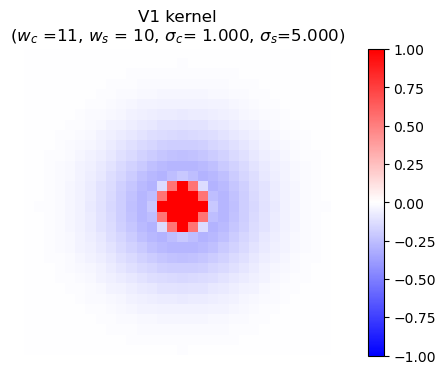

In [4]:
wc,ws,sigma_c,sigma_s = 11,10,1,5
L = 6 * max(sigma_c, sigma_s)   # size of the kernel, cover [-3sigma, 3sigma]
print(f"Kernel size L is set to {L}")

# get the DoG kernel
kernel = get_kernel_DoG(wc,ws,sigma_c,sigma_s,L)
plt.figure(figsize=(10, 4))
plt.imshow(kernel, cmap='bwr', vmax=1, vmin=-1)
plt.title(f"V1 kernel\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sigma_c:.3f}, $\sigma_s$={sigma_s:.3f})")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.axis('off')
plt.show()

### 1.3 plot the contrast sensitivity function

Maximum response at spatial frequency k = 0.524 rad/unit distance


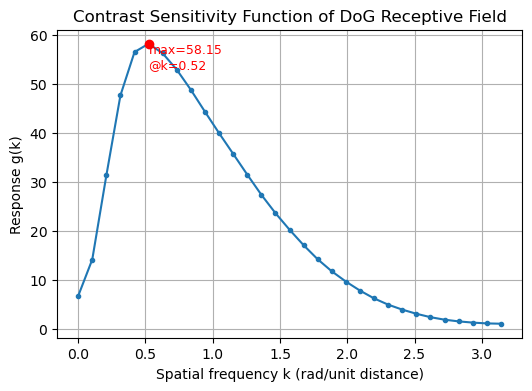

In [ ]:

wc,ws,sigma_c,sigma_s = 11,10,1,5
L = 6 * max(sigma_c, sigma_s)   # size of the kernel, cover [-3sigma, 3sigma]
# print(f"Kernel size L is set to {L}")

# get the DoG kernel
kernel = get_kernel_DoG(wc,ws,sigma_c,sigma_s,L)


k_list = [n*2*pi /(2*L) for n in range(L+1)]
g_list = [g_DoG(k, kernel) for k in k_list]


# plot the contrast sensitivity function
plt.figure(figsize=(6,4))
plt.plot(k_list, g_list, marker='.')
plt.xlabel("Spatial frequency k (rad/unit distance)")
plt.ylabel("Response g(k)")
plt.title("Contrast Sensitivity Function of DoG Receptive Field")
plt.grid()
# --- 找到并标注最大值点 ---
max_idx = np.argmax(g_list)
max_k = k_list[max_idx]
max_g = g_list[max_idx]
plt.scatter(max_k, max_g, color='red', zorder=2)
plt.text(max_k, max_g, f"max={max_g:.2f}\n@k={max_k:.2f}", 
         fontsize=9, color='red', ha='left', va='top')

# plt.savefig(os.path.join(figures_dir, f"DoG_CSF_wc{wc}_ws{ws}_sc{sigma_c}_ss{sigma_s}.pdf"), bbox_inches='tight', pad_inches=0.1)
plt.show()